<a href="https://colab.research.google.com/github/JamesPSlater/Analysis-ML-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
import pandas as pd # data processing
import numpy as np # maths
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# ML libraries
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
from scipy.stats import zscore
data = pd.read_csv('SaYoPillow.csv')
data.head()
# read data and .head()
# ASSUME- data.csv from BCA (cancer analysis)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0


In [ ]:
rndata = data.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'})
rndata.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0


### Q. Define the problem domain

In [ ]:
# Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. 

# Detecting stress levels -> Relationship to sleep


# ENGLISH not Python
# Diagnosis is an ideal label column because it is the result
# useful for a doctor to speed up the diagnosis process. 

### Q. Identify candidate questions for your machine learning project

In [ ]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?

# rndata.info()
#0: 'low/normal', 1: 'medium low', 2: 'medium', 3: 'medium high', 4: 'high'})
rndata['stress level'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: stress level, dtype: int64

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
# data.describe().T

rndata.describe().T

,count,mean,std,min,25%,50%,75%,max
snoring rate,630.00,71.60,19.37,45.00,52.50,70.00,91.25,100.00
respiration rate,630.00,21.80,3.97,16.00,18.50,21.00,25.00,30.00
body temperature,630.00,92.80,3.53,85.00,90.50,93.00,95.50,99.00
limb movement,630.00,11.70,4.30,4.00,8.50,11.00,15.75,19.00
blood oxygen,630.00,90.90,3.90,82.00,88.50,91.00,94.25,97.00
eye movement,630.00,88.50,11.89,60.00,81.25,90.00,98.75,105.00
sleeping hours,630.00,3.70,3.05,0.00,0.50,3.50,6.50,9.00
heart rate,630.00,64.50,9.92,50.00,56.25,62.50,72.50,85.00
stress level,630.00,2.00,1.42,0.00,1.00,2.00,3.00,4.00


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
rndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


Q. Is there any correlation in the data? How would you decide which columns to keep?

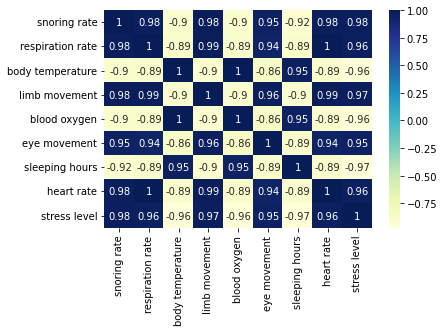

In [ ]:
# sns.heatmap(rndata)
dataplot = sns.heatmap(rndata.corr(), cmap="YlGnBu", annot=True)
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6

Q. Is there any imbalance in the label
?

In [ ]:
# LABEL COLUMN-> Y/value you want to predict
# diagnosis column from bca

# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

rndata['stress level'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: stress level, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

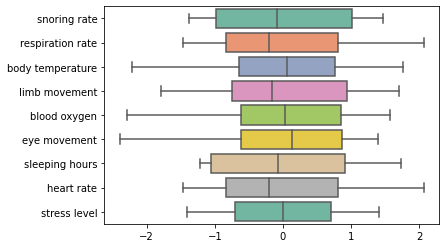

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore
zdata = rndata.apply(zscore)
ax = sns.boxplot(data=zdata, orient="h", palette="Set2")
# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [ ]:
rndata['stress level'] = rndata['stress level'].replace({0:'low/normal',1:'medium low' , 2: 'medium', 3:'medium high', 4:'high'})

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x, y,
#                             test_size=0.2, random_state=42)
y = rndata.pop('stress level')
x = rndata

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
clf = LazyClassifier(verbose=0, predictions=True)
models,predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 29/29 [00:05<00:00,  5.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.06
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
NearestCentroid,1.00,1.00,None,1.00,0.03
LogisticRegression,1.00,1.00,None,1.00,0.20
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.05
LabelSpreading,1.00,1.00,None,1.00,0.15
LabelPropagation,1.00,1.00,None,1.00,0.06
KNeighborsClassifier,1.00,1.00,None,1.00,0.03
GaussianNB,1.00,1.00,None,1.00,0.03


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
 predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,high,high,high,high,high,low/normal,high,high,high,high,...,high,high,high,high,high,high,high,high,high,high
1,low/normal,low/normal,low/normal,low/normal,low/normal,medium low,low/normal,low/normal,low/normal,low/normal,...,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal
2,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,low/normal,...,medium,medium,low/normal,low/normal,low/normal,low/normal,medium low,low/normal,low/normal,low/normal
3,medium,medium low,low/normal,medium low,medium low,medium high,medium low,medium low,medium low,medium low,...,medium,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low
4,medium,medium high,high,medium high,medium high,high,medium high,medium high,medium high,medium high,...,medium high,medium high,medium high,medium high,medium high,medium high,medium high,medium high,medium high,medium high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,medium,medium low,low/normal,medium low,medium low,medium,medium low,medium low,medium low,medium low,...,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low
122,medium,low/normal,low/normal,low/normal,medium low,medium low,low/normal,low/normal,low/normal,low/normal,...,medium,medium,low/normal,medium low,low/normal,low/normal,medium low,low/normal,medium low,medium low
123,medium,medium low,low/normal,medium low,medium low,high,medium low,medium low,medium low,medium low,...,medium,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low
124,medium,medium low,low/normal,medium low,medium low,medium low,medium low,medium low,medium low,medium low,...,medium,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low,medium low


# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [ ]:
joblib_file = "SVC_Model.pk1" 
joblib.dump(predictions, joblib_file)

['SVC_Model.pk1']